<a href="https://colab.research.google.com/github/asetya/BigData/blob/master/imageFeatureIndia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**praktikum mesin learning untuk image recognition menggunakan fitur global **



terdapat 2 buah file, file pertama digunakan untuk menulis fungsi fungsi ekstraksi fitur, file kedua untuk melakukan klasifikasi dan evaluasi 

1. buka google colab https://colab.research.google.com/
2. buat notebook baru 
3. buat blok kode program dengan mengklik +code 
4. jalankan setiap blok kode program dengan mengklik tanda panah ke kanan untuk setiap blok 


jika terdapat pesan bahwa library mahotas tidak ada seperti di bawah ini :
 

```
ModuleNotFoundError                       Traceback (most recent call last)
<ipython-input-1-717b2196b28a> in <module>()
      2 from sklearn.preprocessing import MinMaxScaler
      3 import numpy as np
----> 4 import mahotas
      5 import cv2
      6 import os

ModuleNotFoundError: No module named 'mahotas'

---------------------------------------------------------------------------
NOTE: If your import is failing due to a missing package, you can
manually install dependencies using either !pip or !apt.

To view examples of installing some common dependencies, click the
"Open Examples" button below.
```


 (ModuleNotFoundError: No module named 'mahotas')
 
 tidak di temukan silakan jalankan blok program di bawah ini, dengan mengaktikan dulu kodenya dengan menghapus tanda #

setelah selesai, non aktifkan perintah instal mahotas dan  kembali jalankan blok yang error tadi



In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 7.0MB/s 


jika terdapat pesan bahwa libray cv2 tidak di temukan silakan jalankan blok program di bawah ini, dengan mengaktikan dulu kodenya dengan menghapus tanda #


In [3]:
!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 30.6MB 139kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import cv2
import os
import h5py

Hubungkan kode program ini dengan google drive kita


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


output yang diharapkan : 

Mounted at /content/drive

Copy Dataset dari lokal ke server google colab

In [6]:
cp /content/drive/My\ Drive/dataset1.zip /content/

**unzip dataset di server google colab**

In [7]:
!unzip /content/dataset1.zip

Archive:  /content/dataset1.zip
   creating: dataset1/dataset1/
  inflating: dataset1/dataset1/desktop.ini  
   creating: dataset1/dataset1/test/
  inflating: dataset1/dataset1/test/1.jpg  
  inflating: dataset1/dataset1/test/2.jpg  
  inflating: dataset1/dataset1/test/3.jpg  
  inflating: dataset1/dataset1/test/76.jpg  
  inflating: dataset1/dataset1/test/77.jpg  
  inflating: dataset1/dataset1/test/78.jpg  
  inflating: dataset1/dataset1/test/79.jpg  
  inflating: dataset1/dataset1/test/80.jpg  
  inflating: dataset1/dataset1/test/desktop.ini  
   creating: dataset1/dataset1/train/
   creating: dataset1/dataset1/train/bluebell/
  inflating: dataset1/dataset1/train/bluebell/1.jpg  
  inflating: dataset1/dataset1/train/bluebell/10.jpg  
  inflating: dataset1/dataset1/train/bluebell/11.jpg  
  inflating: dataset1/dataset1/train/bluebell/12.jpg  
  inflating: dataset1/dataset1/train/bluebell/13.jpg  
  inflating: dataset1/dataset1/train/bluebell/14.jpg  
  inflating: dataset1/dataset1/tr

output yang diharapkan : 



```
Archive:  /content/dataset1.zip
  inflating: dataset1/desktop.ini    
  inflating: dataset1/test/desktop.ini  
   creating: dataset1/train/
   creating: dataset1/train/bluebell/
  inflating: dataset1/train/bluebell/1.jpg  
  inflating: dataset1/train/bluebell/10.jpg  
  inflating: dataset1/train/bluebell/11.jpg  
  inflating: dataset1/train/bluebell/12.jpg  
  inflating: dataset1/train/bluebell/13.jpg  
  inflating: dataset1/train/bluebell/14.jpg  
  inflating: dataset1/train/bluebell/15.jpg  
  inflating: dataset1/train/bluebell/16.jpg  
  ....
```



tentukan jumlah image per kelas, ukuran standard, nama folder di mana data training disimpan, output dan jumlah bins untuk histogram 

In [8]:
images_per_class = 80
fixed_size       = tuple((500, 500))
train_path       = "dataset1/dataset1/train"
h5_data          = 'output/data.h5'
h5_labels        = 'output/labels.h5'
bins             = 8
print("jumlah image per kelas : ", images_per_class, "train path : ", train_path, "; file h5 untuk label : ",h5_labels, ";jumlah bins dalam histogram :", bins)

jumlah image per kelas :  80 train path :  dataset1/dataset1/train ; file h5 untuk label :  output/labels.h5 ;jumlah bins dalam histogram : 8


output yang diharapkan : 

jumlah image per kelas :  80 train path :  dataset1/train ; file h5 untuk label :  output/labels.h5 ;jumlah bins dalam histogram : 8

jalankan perintah untuk membuat direktori output

In [9]:
output_path="output"
if not os.path.exists(output_path ):
    os.makedirs(output_path )
print(output_path)

output


output yang di harapkan 

output

Fungsi untuk mengektraksi fitur hu moments

In [10]:
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

**fungsi untuk mencari haralick feature**

In [11]:
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick


**Fungsi untuk ekstraksi histogram**

In [12]:
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()

Copy the file

In [13]:
cp /content/drive/My\ Drive/essexUni.jpg /content/

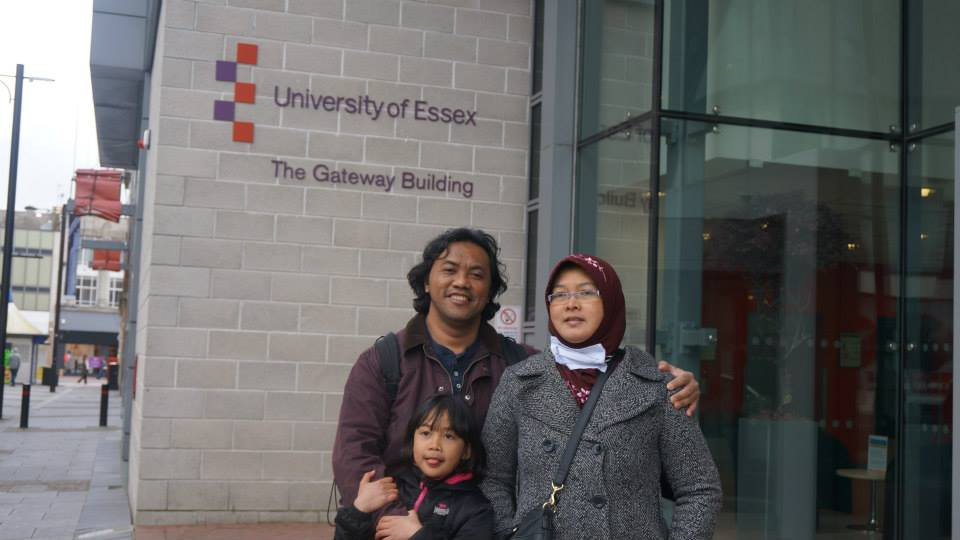

In [14]:
from google.colab.patches import cv2_imshow
image = cv2.imread('essexUni.jpg')
cv2_imshow(image) 

Rotated the image 

In [15]:
cp /content/drive/My\ Drive/essexUniterbalik.jpg /content/

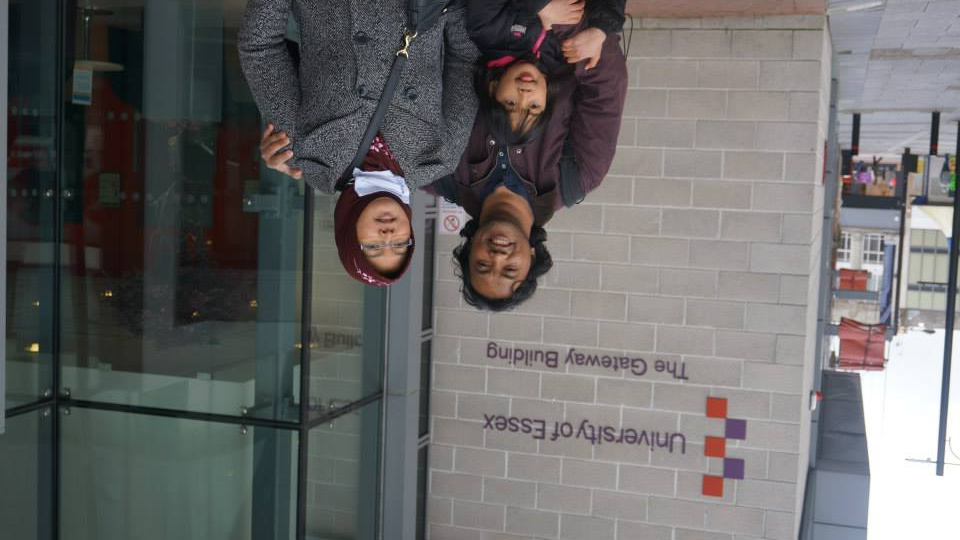

In [16]:
image1 = cv2.imread('essexUniterbalik.jpg')
cv2_imshow(image1)

**calculate Histogram**

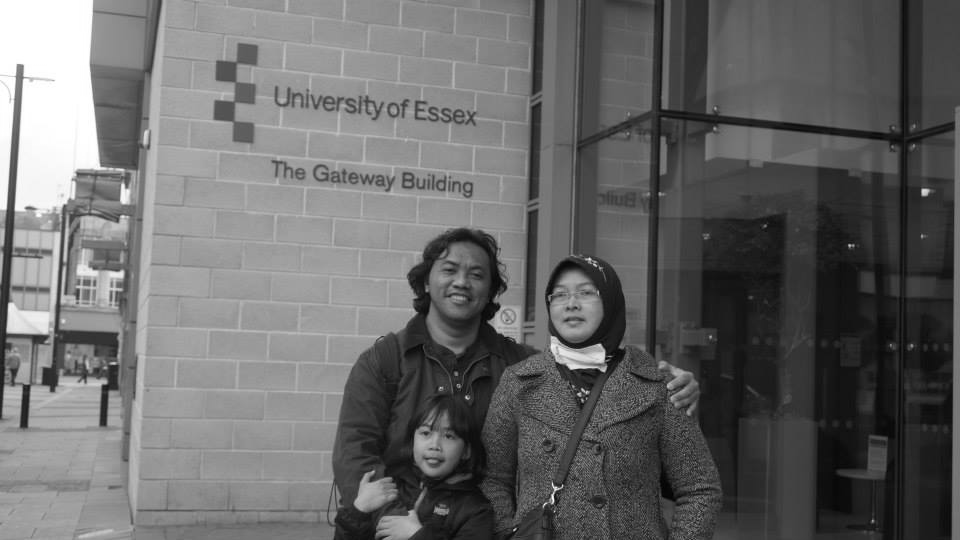

In [17]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [18]:
fv_histogram  = fd_histogram(image)
fv_histogram1 = fd_histogram(image1) 

In [19]:
fv_histogram[1:10]

array([0.0251879 , 0.01046199, 0.03593122, 0.7158903 , 0.43549135,
       0.00977625, 0.09254906, 0.00931908, 0.023201  ], dtype=float32)

In [20]:
fv_histogram1[1:10]

array([0.0251879 , 0.01046199, 0.03593122, 0.7158903 , 0.43549135,
       0.00977625, 0.09254906, 0.00931908, 0.023201  ], dtype=float32)

Calculate Hue Moments 

In [21]:
fv_hu_moments = fd_hu_moments(image)
fv_hu_moments1 = fd_hu_moments(image1)

In [22]:
fv_hu_moments

array([ 1.66828517e-03,  6.19345667e-07,  5.50833404e-10,  5.00761606e-10,
        2.49016174e-19,  3.89292824e-13, -8.46181919e-20])

In [23]:
fv_hu_moments1

array([ 1.66828517e-03,  6.19345667e-07,  5.50833404e-10,  5.00761606e-10,
        2.49016174e-19,  3.89292824e-13, -8.46181919e-20])

**Calculate Haralick Features**

In [24]:
fv_haralick   = fd_haralick(image)
fv_haralick1   = fd_haralick(image1)


In [25]:
fv_haralick 

array([ 1.19159127e-03,  9.85287420e+01,  9.84693817e-01,  3.21878529e+03,
        4.28545321e-01,  2.08383560e+02,  1.27766124e+04,  8.35560464e+00,
        1.15307784e+01,  5.97151107e-04,  3.57971588e+00, -4.41770017e-01,
        9.99087765e-01])

In [26]:
fv_haralick1

array([ 1.19159127e-03,  9.85287420e+01,  9.84693817e-01,  3.21878529e+03,
        4.28545321e-01,  2.08383560e+02,  1.27766124e+04,  8.35560464e+00,
        1.15307784e+01,  5.97151107e-04,  3.57971588e+00, -4.41770017e-01,
        9.99087765e-01])

**Lets Try Different Image**

In [27]:
cp /content/drive/My\ Drive/plain.jpg /content/

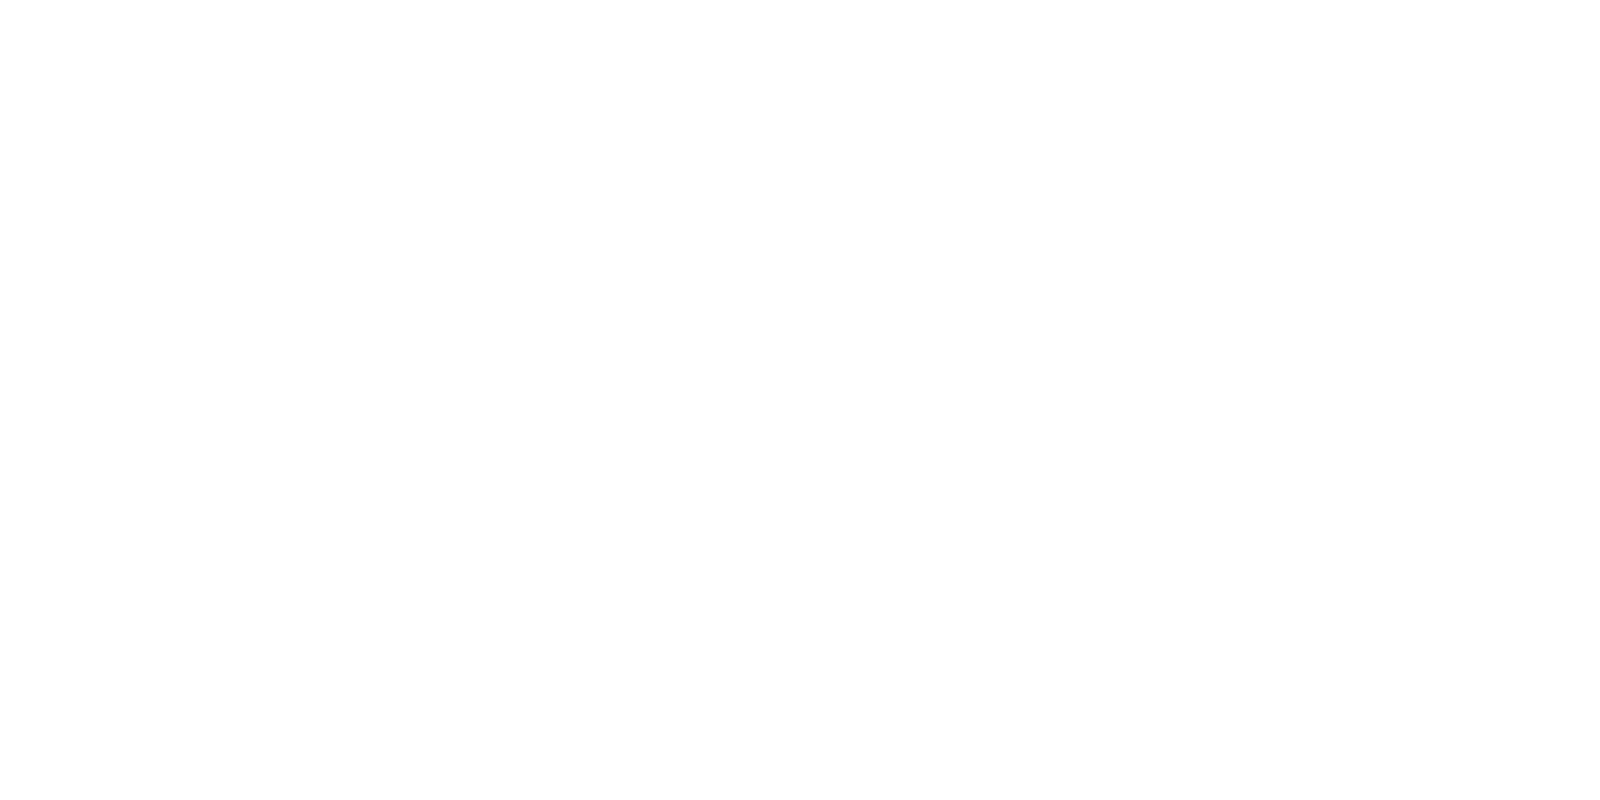

array([1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 5.10000000e+02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.89099121e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [28]:
image2 = cv2.imread('plain.jpg')
cv2_imshow(image2)
fv_haralick2   = fd_haralick(image2)
fv_haralick2

**Program utama untuk membaca semua image pada training dataset dan mengekstraksi fitur hu moments, haralick fitur dan histogram colour dari masing masing image**


1. membaca daftar sub folder pada path dimana dataset training berada : train_path       = "dataset1/train"
2. jika di perhatikan di dalam folder train ada beberapa folder dan 1 file 

In [ ]:
train_labels = os.listdir(train_path)
print(train_labels)
# sort the training labels
train_labels.sort()
print(train_labels)

# empty lists to hold feature vectors and labels
global_features = []
labels          = []

['bluebell', 'coltsfoot', 'buttercup', 'desktop.ini']
['bluebell', 'buttercup', 'coltsfoot', 'desktop.ini']


output yang diharapkan : 


```
['buttercup', 'coltsfoot', 'bluebell', 'desktop.ini']
['bluebell', 'buttercup', 'coltsfoot', 'desktop.ini']
```



3. Kode program untuk perulangan sebanyak train_labels (jumlah sub folder pada train_path 
4. pastikan yang di dalam folder train adalah folder - bukan file
5. ulangi untuk semua image dalam setiap folder sampai dengan maksimal sebanyak variabel image_perclass 
6. untuk setiap image - ubah ukuran menjadi ukuran standard dengan perintah resize 
7. ekstrak fitur haralic, hu dan histogram dari setiap image 
8. gabungkan semua fitur global menjadi 1 lalu simpan variabel global_feature 
9. untuk setiap perulangan selesai - simpan variabel global_features ke dalam array global_features sebagai baris baru dengan perintah append

In [ ]:
for training_name in train_labels:
  dir = os.path.join(train_path, training_name)
  if os.path.isdir(dir):
    print(dir)
    print(" adalah folder")
    current_label = training_name
    for x in range(1,images_per_class+1):
          # get the image file name
          file = dir + "/" + str(x) + ".jpg"

          # read the image and resize it to a fixed-size
          image = cv2.imread(file)
          image = cv2.resize(image, fixed_size)

          ####################################
          # Global Feature extraction
          ####################################
          fv_hu_moments = fd_hu_moments(image)
          fv_haralick   = fd_haralick(image)
          fv_histogram  = fd_histogram(image)

          ###################################
          # Concatenate global features
          ###################################
          global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

          # update the list of labels and feature vectors
          labels.append(current_label)
          global_features.append(global_feature)
    print("[STATUS] processed folder: {}".format(current_label))
 


  



dataset1/dataset1/train/bluebell
 adalah folder
[STATUS] processed folder: bluebell
dataset1/dataset1/train/buttercup
 adalah folder
[STATUS] processed folder: buttercup
dataset1/dataset1/train/coltsfoot
 adalah folder
[STATUS] processed folder: coltsfoot


output yang diharapkan : 



```
dataset1/train/bluebell
 adalah folder
[STATUS] processed folder: bluebell
dataset1/train/buttercup
 adalah folder
[STATUS] processed folder: buttercup
dataset1/train/coltsfoot
 adalah folder
[STATUS] processed folder: coltsfoot
```



**End Loop Training untuk seluruh sub folder **


tampilkan ukuran vektor global features 

tampilkan array training labels 

In [ ]:
# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(global_features).shape))

# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels).shape))



[STATUS] feature vector size (240, 532)
[STATUS] training Labels (240,)


[STATUS] feature vector size (240, 532)
[STATUS] training Labels (240,)

Encoding target label 

In [ ]:
# encode the target labels
targetNames = np.unique(labels)
le          = LabelEncoder()
target      = le.fit_transform(labels)
print("[STATUS] training labels encoded...")



[STATUS] training labels encoded...


output di harapkan 

[STATUS] training labels encoded...

Standarisasi nilai vektor menjadi 0 sampai dengan 1 untuk semua data 

In [ ]:
# scale features in the range (0-1)
scaler            = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print("[STATUS] feature vector normalized...")

print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))



[STATUS] feature vector normalized...
[STATUS] target labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[STATUS] target labels shape: (240,)


outout di harapkan : 



```
[STATUS] feature vector normalized...
[STATUS] target labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[STATUS] target labels shape: (240,)
```



simpan semua data ke lam file h5 dan disimpan dalam folder yang telah diset pada bagian awal program ini

In [ ]:
# save the feature vector using HDF5
h5f_data = h5py.File(h5_data, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File(h5_labels, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()

print("[STATUS] end of Feature Extraction..")    


[STATUS] end of Feature Extraction..


Output di harapkan : 

[STATUS] end of Feature Extraction..

# **Kode Program Lanjutan di bawah ini adalah untuk melakukan training dan Testing terhadap fitur yang sudah di ekstraks untuk beberapa algoritma klasifikasi **

Import tambahan library yang diperlukan 

In [50]:

import glob
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib
warnings.filterwarnings('ignore')

Mengeset variabel yang dapat ditune
jika lanjutan ini di file terpisah dapat di tambahkan : 


```
# This is formatted as code
train_path = "dataset/train"
h5_data    = 'output/data.h5'
h5_labels  = 'output/labels.h5'
```



In [46]:
# tunable-parameters
#--------------------
num_trees = 100
test_size = 0.10
seed      = 9
scoring    = "accuracy"
test_path  = "dataset1/dataset1/test"


Menambahkan folder test jika belum ada 

In [47]:
if not os.path.exists(test_path):
    os.makedirs(test_path)

Menginisialisasi model klasifier 


In [48]:
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=seed)))
models.append(('ANN', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)))

# variables to hold the results and names
results = []
names   = []
print (models)

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=9, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')), ('CART', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
      

Output yang diharapkan :

```
# This is formatted as code

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=9, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)), ('LDA', LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)),
                            ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')), ('CART', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=9, splitter='best')), ('RF', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=9, verbose=0,
                       warm_start=False)), ('NB', GaussianNB(priors=None, var_smoothing=1e-09)), ('SVM', SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=9, shrinking=True, tol=0.001,
    verbose=False))]
```



```
# This is formatted as code
```



Membaca file h5 dimana hasil ekstraki fitur disimpan 
ini tidak perlu jika program lanjutan ini tidak menjadi file terpisah 


In [49]:
h5f_data  = h5py.File(h5_data, 'r')
h5f_label = h5py.File(h5_labels, 'r')

print(h5f_data)
print(h5f_label)

OSError: ignored

output diharapkan : 



```
<HDF5 file "data.h5" (mode r)>
<HDF5 file "labels.h5" (mode r)>
```



menyimpan fitur 

In [ ]:
global_features_string = h5f_data['dataset_1']
global_labels_string   = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels   = np.array(global_labels_string)

print(global_features)
print(global_labels_string)



output diharapkan : 


```
[[1.02277289e-02 6.41539399e-02 3.80293751e-01 ... 8.69740569e-01
  6.21634972e-02 8.80157045e-01]
 [2.70794117e-05 2.24351000e-02 1.26657213e-02 ... 8.69741443e-01
  6.21926975e-02 8.80154788e-01]
 [0.00000000e+00 3.14553867e-02 1.64679193e-02 ... 8.69741419e-01
  6.21939464e-02 8.80158524e-01]
 ...
 [6.83042966e-03 1.17875410e-02 1.00131224e-02 ... 8.69668780e-01
  5.76707307e-02 8.80238908e-01]
 [1.42973036e-02 3.31645389e-02 2.45463253e-02 ... 8.69637236e-01
  6.18151726e-02 8.80100514e-01]
 [1.60889028e-03 9.45723423e-04 3.74527032e-03 ... 8.69873367e-01
  6.80346632e-02 8.80016124e-01]]
<HDF5 dataset "dataset_1": shape (720,), type "<i8">
```



Menutup file h5 
ini tidak perlu di eksekusi jika tadi tidak di buka 

In [ ]:
h5f_data.close()
h5f_label.close()

menampilkan ukuran fitur dan label dari hasil ekstraksi fitur global images 

In [ ]:
# verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] labels shape: {}".format(global_labels.shape))

melakukan pembagian dataset menjadi train dan testing dataset 

In [ ]:
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))

output yang diharapkan : 

[STATUS] splitted train and test data...

Train data  : (216, 532)

Test data   : (24, 532)

Train labels: (216,)

Test labels : (24,)

Melatih model dan menghitung akurasi dari masing masing model yang berbeda klasiifier 

In [ ]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

output yang diharapkan : 



```
LR: 0.883550 (0.053308)
LDA: 0.480952 (0.102552)
KNN: 0.800000 (0.095534)
CART: 0.847186 (0.042528)
RF: 0.934848 (0.037270)
NB: 0.786147 (0.127983)
SVM: 0.879004 (0.044374)
ANN: 0.794805 (0.103271)
```



Plot akurasi dan deviasi dalam box plot diagram 



In [ ]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


output yang diharapkan  adalah blok plot 